
# Project: Investigate a Dataset (No-show appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<br>
Objective: No-show appointments significantly impact the functioning of healthcare institutions, and much study has been performed to uncover and analyze the factors that influence no-show behavior. In this project, we want to find out the correlated features with No-Show appointments, which could used in an evidence-based predictive model for patient no-shows in the future.
<br>
No-show appointments Dataset: It collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment
    
<br>
'ScheduledDay’ tells us on what day the patient set up their appointment.
<br>
‘Neighborhood’ indicates the location of the hospital.
<br>
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program.
<br>
‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
<br>
We want to find out what factors are important to predict if a patient will show up for their scheduled appointment by analyzing the current dataset. The following questions will be addressed:
<br>
a. The distribution of patient age for no-shows vs shows.
<br>
b. The effect of SM reminder for no-shows vs shows.
<br>
c. The influnce of neighborhoods to no-shows. 
<br>
d. The corelation of timeframe between schedule date and appointment date  to no-shows.

<a id='wrangling'></a>
## Data Wrangling
<br> Import data analysis packages; 
<br> Load the dataset and check the integrity and information of dataset. 

<br>1.The following packages will be used for the analysis: pandas, numpy, datetime and matplotlib.

In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

<br>2.Import the CSV file and review some general properties of the dataset.
<br>  The dataset has 14 columns, which includes “PatientId”, “AppointmentID”, “Gender”, “ScheduledDay”, “AppointmentDay”, “Age”, “Neighbourhood”, “Scholarship”, “Hipertension”, “Diabetes”, “Alcoholism”, “Handcap”, “SMS_received” and “No-show”. It seems that there is typos in column names like “Hipertension” and “Handcap”. We will need correct these names later for better communication.

In [48]:
df = pd.read_csv(r"C:\Users\Yan\Desktop\udacity\Project 2\noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<br>3.Check the shape and general information to see if there is any missing values a in the current dataset and also check the data type to see if it is appropriate for the analysis. The dataset has 110527 rows and 14 columns. Basing on the information of dataset, all of the 14 columns have the 110527 records, which means there is no missing values. The types of variables seem fine to the current analysis except for the “PatientId”. The type of integer would be more appropriate than of float.

In [49]:
 df.shape

(110527, 14)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<br>4.Find if there is any duplicates in the dataset. If there is any, we would check to see if it is necessary to remove if for better understanding the data. It seems there is no duplicates. 

In [51]:
sum(df.duplicated())

0

<br>5.Perform preliminary statistical analysis to simple summaries about the features of the data. The mean of age in this dataset is about 37. The minimal age is “-1” and the maximal age is “115”. It seems unreasonable for a patient with the age of “-1”. Basing on the information from Kaggle, the record is for an unborn infant, which will be kept in the dataset. There is only two values for the variable of “SM-received” (0 and 1). My understanding is this indicates if the patients received SM reminders, although it is informed as the numbers receiving SM reminders from Kaggle.

In [52]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> 
### Data Cleaning 

<br> 1.	Change "Hipertension” and “Handcap to “Hypertension” and “Handicap” for better communication. 

In [53]:
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap', 'No-show': 'No_show'}, inplace = True)

<br>2. Change the format of “ScheduledDay” and “AppointmentDay” to datetime for easily carrying out analysis and better understanding.

In [54]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay   = df.ScheduledDay.apply(np.datetime64)

<br>3. Create a new column (windows): the elapse days bewteen the scheduled day and appoiment day, and confirm the change. We will use this new variable to check if the length of elapse days is corelated with No-show apppointment behaviours.

In [55]:
df['windows'] = df['AppointmentDay'] - df['ScheduledDay']

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
windows           110527 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(8), object(3), timedelta64[ns](1)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (The distribution of patient age for no-shows vs shows?)

<br>1. Check the numbers of patients for no-shows vs shows and get a basic outline for the structure of dataset. We find that the patient number of showing up for the appointment in the dataset is about 3 times more than that of no showing up.The distribution of patients in the dataset might impact on the our ananlysis.

In [57]:
df.groupby('No_show')['No_show'].agg(['count'])

,count
No_show,
No,88208
Yes,22319


<br>2. In order to analyze the characteristics of No-show appointment behavor, we split the dataset into two datasets: no-shows andd shows. We will use these two new datasets to do comparison of some features to find out what factors affect/relate with the No-show appointment. 

In [58]:
no_shows = df.query('No_show == "Yes"')
shows = df.query('No_show == "No"')

In [59]:
no_shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,windows
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2 days 15:15:48
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,0 days 14:31:03
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,1 days 16:08:46


<br>3. The preliminary statistical parameters are checked for the no_shows dataset. The mean of age in this dataset is about 34. The minimal age is “0” and the maximal age is “115”. The mean of elapsed day (windows) is about 15 days.

In [60]:
no_shows.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,windows
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15 days 08:17:34.998879
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,16 days 14:24:19.715831
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 10:47:25
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10 days 07:42:31
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22 days 15:44:33
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01


In [61]:
shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,windows
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


<br>4. The preliminary statistical parameters are checked for the shows dataset. The mean of age in this dataset is about 38, which is older than that in the no_shows dataset. This might imply that older patients seems more likely for showing up for appointment than youner patients. The mean of elapsed day (windows) is about 8 days, which is shorter than that in no_shows dataset (15 days). 

In [62]:
shows.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,windows
count,8.820800e+04,8.820800e+04,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208
mean,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8 days 06:56:46.224594
std,2.563747e+14,6.931225e+04,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,14 days 12:57:11.876227
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +03:15:06
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +14:59:00.250000
50%,3.176184e+13,5.685684e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1 days 14:56:44
75%,9.433715e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11 days 15:25:55
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:17:18


<br>5. Check the distribution of patient age for no-shows vs shows. We use histgram to visualize the age distribution for No Shows and Shows, and also easily compare the characteristics of these two distributions. From the below graphs, we find that most of patients for two dataset are aging from 0 to 60. It is reasonable that senior patients might not go for medical appointments and will use some other services.

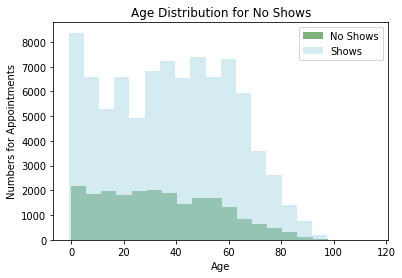

In [63]:
plt.hist(no_shows['Age'], bins=20, label='No Shows', alpha=.5, color='darkgreen')
plt.hist(shows['Age'], bins=20, label='Shows', alpha=.5, color='lightblue')
plt.title('Age Distribution for No Shows')
plt.xlabel('Age')
plt.ylabel('Numbers for Appointments')
plt.legend()


### Research Question 2  (The effect of SM reminder for no-shows vs shows?)
<br>1. Check the patient distribution of SM reminders for no-shows vs shows to see if there is any correaltion between SM reminders and no_show appointment behavior. It seems reasonable for expecting that sending SM reminders will help to improve no_show appointment behavior to save a lot of medical resouces. 

In [64]:
new_df=no_shows.groupby('SMS_received')['SMS_received'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "No SMS"
new_df.iloc[1,0] = "SMS"

In [65]:
nos_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

<br>2. Calculate the ratio of the patients of no-receiving SM reminders and the patients of receiving SM reminders for the dataset of no_shows. The proportion seems pretty equal for these two types of patients.

In [66]:
new_df['proportion'] = [nos_prop, shows_prop]
new_df.head()

,appt_status,total,proportion
0,No SMS,12535,0.561629
1,SMS,9784,0.438371


In [67]:
new_df2=shows.groupby('SMS_received')['SMS_received'].agg(['count'])
new_df2.reset_index(inplace=True)
new_df2.columns = ['appt_status', 'total']
new_df2.iloc[0,0] = "No SMS"
new_df2.iloc[1,0] = "SMS"


In [68]:
nos_prop = new_df2.iloc[0,1] / (new_df2.iloc[0,1] + new_df2.iloc[1,1])
shows_prop = new_df2.iloc[1,1] / (new_df2.iloc[0,1] + new_df2.iloc[1,1])

<br>3. Calculate the ratio of the patients of no-receiving SM reminders and the patients of receiving SM reminders for the dataset of shows.  Basing on the results, most of the patients showing up for appointment did not receive the reminders, which is out of our expection.

In [69]:
new_df2['proportion'] = [nos_prop, shows_prop]
new_df2.head()

,appt_status,total,proportion
0,No SMS,62510,0.708666
1,SMS,25698,0.291334


### Research Question 3  (The influnce of  neighbourhoods to shows?)
<br> 1.We want to identify if no-show appointment behavior is a habit relating to the distribution of geograpy. For this objective, we group Neighbourhood for both no_shows and shows dataset to check. We list the top10 neighbourhoods that have the high numbers of patients in the dataset of shows. "JARDIM CAMBURI" and "MARIA ORTIZ" are the top1 and top2 on the list, respectively.

In [70]:
shows_neighbourhood=shows.groupby('Neighbourhood')['No_show'].agg(['count'])

In [71]:
shows_neighbourhood=shows_neighbourhood.sort_values('count',ascending=False)
shows_neighbourhood.head(10)

,count
Neighbourhood,
JARDIM CAMBURI,6252
MARIA ORTIZ,4586
RESISTÊNCIA,3525
JARDIM DA PENHA,3246
SANTA MARTHA,2635
CENTRO,2631
ITARARÉ,2591
TABUAZEIRO,2559
SANTO ANTÔNIO,2262


<br>2. We list the top10 neighbourhoods that have the high numbers of patients in the dataset of no-shows. Surprisely, "JARDIM CAMBURI" and "MARIA ORTIZ" are also the top1 and top2 on the list, respectively. 

In [72]:
no_shows_neighbourhood=no_shows.groupby('Neighbourhood')['No_show'].agg(['count'])

In [73]:
no_shows_neighbourhood=no_shows_neighbourhood.sort_values('count',ascending=False)
no_shows_neighbourhood.head(10)

,count
Neighbourhood,
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,906
CENTRO,703
JESUS DE NAZARETH,696
JARDIM DA PENHA,631
CARATOÍRA,591
TABUAZEIRO,573


<br> 3. To test if there is correlation of the length of elapsed days between the scheduled day and the appointment day, we check the mean of time to appointment for no_shows and shows datasets. The elaspsed days from no-shows dataset and shows dataset are 15 days and 8 days, respectively. 

In [74]:
time_no_shows=no_shows['windows'].mean()
time_no_shows

Timedelta('15 days 08:17:34.998879')

In [75]:
time_shows=shows['windows'].mean()
time_shows

Timedelta('8 days 06:56:46.224594')

<br> In order to examine if the longer elaspsed days  is correlated  with no-show appointment behavior, we use the histgram to visualize the elapsed days from the two datasets (no_shows and shows). It is obviously shown in the graph that the patients to show for the appointment has shorter elapsed days than that of patients that did not show for the appointment .  

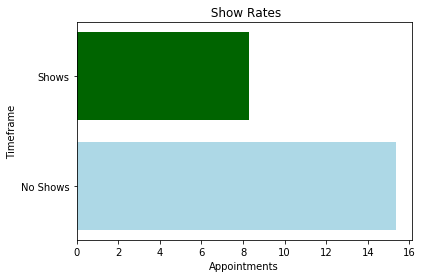

In [76]:
locations = [1, 2]
heights = [time_no_shows/np.timedelta64(1, 'D'), time_shows/np.timedelta64(1, 'D')]
labels = ['No Shows', 'Shows']

plt.barh(locations, heights, tick_label=labels, color=['lightblue','darkgreen'])
plt.title(' Show Rates')
plt.xlabel('Appointments')
plt.ylabel('Timeframe');

<a id='conclusions'></a>
## Conclusions

<br> 
This dataset has 110527 observations with 14 varabiles and there is no missing values or duplicates. 88208 observations are for "No shows data" and 22319 observations are for "shows data". Since the numbers of observations for no show group and show group are much different,  the analysis could be biased. All of 110527 observations are from only one year(2016),  which might limit the representative of the ananlysis at some extent. 
<br>
Basing on the current dataset, we addressed the following 4 questions:
<br>
a. The distribution of patient age for no-shows vs shows?
<br>
From the histgram graphs we made for comparing the distribution of patient age for no-shows vs shows, we find that the shapes of two graphs are similar and most of the patients in the two groups are ranging from 0 to 60 years old. There was a small difference between the no-shows and shows since the mean age of the no-shows group is 34 and that of the shows group is 38. It seemed that younger patients are mored inclined to have the no-show appointment behavior than that of older patients.  
<br>
b. The effect of SM reminder for no-shows vs shows?
For the no show group, it seems there is no significant effect for receiving SM reminder on show rate (56% vs. 44%). However, for the show group. there are more patient go for the appointments without receiving SM reminders. Therefore, it seems there is no impact for receiving SM reminders on showing up for the appoinment, which might cause our notice to introduce some other ways to improve this behavior.
<br>
c. The influnce of neighborhoods to no-shows?
<br>
Neighborhood in which the appointment took place was grouped to see if there is potential influnce on showing for the appoinments. JARDIM CAMBURI and MARIA ORTIZ were the top 2 neighborhoods in both the no-shows and shows, resulting from the large patient populations of these area. So we didn't get any evidence to show that the geograpy has influnce on shows rate basing on the current dataset. 
<br>
d. The corelation of elapsed days between schedule date and appointment date with no-show appointment behavior?
<br>
Timeframe between the scheduled date and apppointment date was caculated and investigated to see if there was any correlation with show rates. Basing on the plots, the mean timeframe for no-shows was significantly higher than that of shows (15 days vs. 8 days). The show rate was much better if the appointment was booked fewer days from the appointment date. Since there is a obvious correlation between the number of elasped days and appointment show rate, the elapsed days might be as a indicator for building a model of appoiment show rate.

<br> In this project, we find out patient age and the elapsed days are correlated with no-show appointment behavior. More factors like patient show rate history and region weather on appoiment day might be involved in the datasets for building an evidence-based predictive model for patient no-shows in the future.